In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
pd.options.mode.chained_assignment = None
import json
import sys
import random
sys.path.append('../tdiff_path/')

# import some modules that I created to do some data processing.

import dataset_operations.dataset_operations as do
import retrieve_data.retrieve_data as retrieve

In [2]:
# I have metadata for all the datasets I have available stored in a csv.
site_file_metadata=pd.read_csv('site_file_metadata.csv')

In [3]:
# Let's check out the data we have available!
available_data = site_file_metadata.loc[:,['site','date','data_type', 'interim_data']]# .sort_values(by=['site', 'date'])

print(available_data)

   site      date         data_type  interim_data
0   CLY  20160628     feedline-VSWR          True
1   CLY  20160701     feedline-VSWR         False
2   CLY  20160701  transmitter-path         False
3   CLY  20160701           pm-path         False
4   CLY  20180817     feedline-VSWR          True
5   CLY  20180817     feedline-VSWR         False
6   CLY  20180817  transmitter-path         False
7   CLY  20180817           pm-path          True
8   CLY  20180817           pm-path         False
9   INV  20170811     feedline-VSWR         False
10  INV  20170813  transmitter-path         False
11  INV  20170813           pm-path         False
12  PGR  20171003     feedline-VSWR         False
13  PGR  20170930     feedline-VSWR          True
14  PGR  20170930  transmitter-path         False
15  PGR  20171001           pm-path         False
16  RKN  20160705     feedline-VSWR          True
17  RKN  20160721     feedline-VSWR         False
18  RKN  20160719  transmitter-path         False


In [4]:
# Now we can choose a site, date, and data type that we want to look at, and pass in the index of the data.

%run load_data.py 0

site                                                              CLY
date                                                         20160628
interim_data                                                     True
data_location       /home/shared/Sync/Sites/Clyde_River/Trips/2016...
mapping_filename    /home/shared/Sync/Sites/Clyde_River/Trips/2016...
data_type                                               feedline-VSWR
Name: 0, dtype: object

The data has been successfully loaded.


In [5]:
# load_data.py has made the following available to us:
# working_dataframe, with all information on all channels from this site, date, and data type
# linear_fit_dict, with information on the phase path for each channel
# cable_loss_dataset_dict, if we chose feedline-VSWR datatype, which is used to calculate a single-direction 
#   path from a VSWR measurement.

# Here is a few lines from the working dataframe
print(working_dataframe.head())

      freq    M0vswr  M0phase_deg    M1vswr  M1phase_deg    M2vswr  \
0  8000000  1.568935   -46.580879  1.648281   -15.810630  1.568224   
1  8060000  1.527980   -60.426704  1.603460   -25.818602  1.535383   
2  8120000  1.488911   -75.292938  1.591219   -36.177273  1.499444   
3  8180000  1.461070   -91.149307  1.626034   -46.512268  1.466338   
4  8240000  1.417566  -107.794510  1.691505   -57.781101  1.424836   

   M2phase_deg    M3vswr  M3phase_deg    M4vswr       ...         I2phase_rad  \
0   -40.249176  1.556761   -40.419334  1.556941       ...           -0.316166   
1   -54.013847  1.523542   -54.348137  1.542182       ...           -0.474608   
2   -68.624809  1.484050   -69.573700  1.513706       ...           -0.665185   
3   -83.529434  1.451516   -84.775726  1.481565       ...           -0.915204   
4   -98.697281  1.409899  -100.127289  1.436168       ...           -1.177354   

   I3phase_rad  M_all_phase_deg_unwrap  M_all_phase_rad  M_all_phase_deg  \
0    -0.492929  

In [6]:
# We can also take a look at what's in the linear_fit_dict:
print(linear_fit_dict.keys())
print(linear_fit_dict['M0'].keys())

dict_keys(['M0', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'I0', 'I1', 'I2', 'I3', 'M_all_', 'I_all_'])
dict_keys(['slope', 'intercept', 'rvalue', 'pvalue', 'stderr', 'offset_of_best_fit_rads', 'time_delay_ns', 'best_fit_line_rads'])


In [ ]:
# calculate array difference between arrays:
# TODO continue here
if 'M_all_channels' and 'I_all_channels' in working_dataframe.columns:
    # calculate array difference
        # Computing the phase difference between the arrays and
    # also getting tdiff across the frequency range.
    array_diff_raw = []
    for m, i in zip(unwrapped_main_array, unwrapped_intf_array):
        freq = i['freq']
        phase_diff = (m['phase_deg'] - i['phase_deg'])
        array_diff_raw.append((freq, phase_diff, 0.0))
    array_diff_raw = np.array(array_diff_raw, dtype=[('freq', 'i4'), ('phase_deg', 'f4'),
                                             ('time_ns', 'f4')])

    array_diff = do.wrap_phase(array_diff_raw)

    # Now insert the tdiff in ns after the phase has been wrapped.
    # This is the time difference between the signal incident on the main array
    # antennas reaching the end of the feedlines and the interferometer array signal
    # reaching the end of the feedlines. This is a portion of the entire path from
    # antennas to receiver. The entire path's time difference is a calibrated value
    # used in SuperDARN data analysis, and is assumed to be constant across the
    # frequency spectrum, as would be expected if the path was completely linear (such
    # as a cable).
    for dp in array_diff:
        freq = dp['freq']
        phase = dp['phase_deg']
        time_ns = phase * 1e9 / (freq * 360.0)
        dp['time_ns'] = time_ns
    

if 'M_combined' and 'I_combined' in working_dataframe_columns:
    # calculate array difference

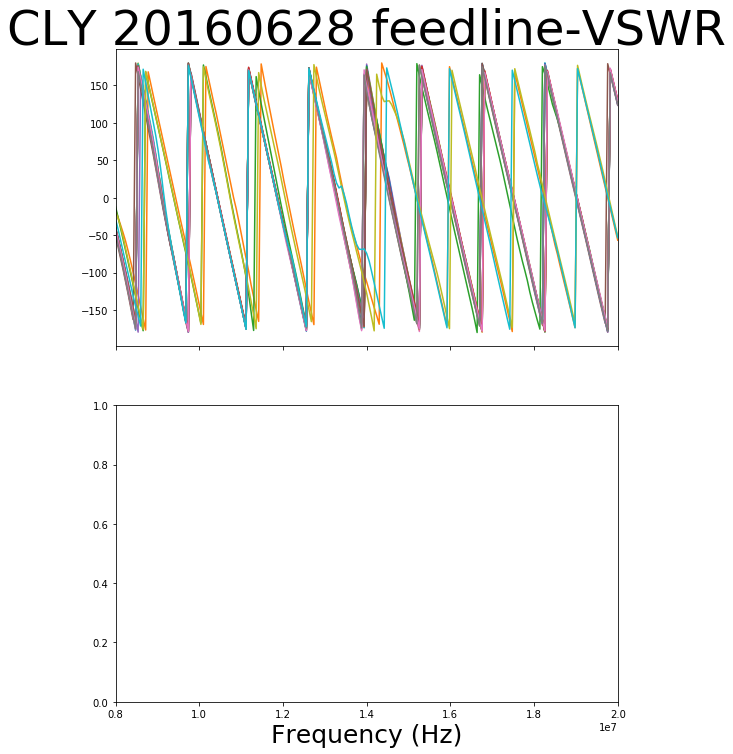

In [7]:
plot_title = working_site + ' ' + str(working_date) + ' ' + working_data_type

fig, smpplot = plt.subplots(2, 1, sharex='all', figsize=(9,12))
xmin, xmax, ymin, ymax = smpplot[0].axis(xmin=8e6, xmax=20e6)
smpplot[1].set_xlabel('Frequency (Hz)', size=25.0)
smpplot[0].set_title(plot_title, size=48.0)

for channel in channels:
    smpplot[0].plot(working_dataframe['freq'], working_dataframe[channel + 'phase_deg'], label=channel)
    
plt.show()

plotting


KeyError: 'phase_deg'

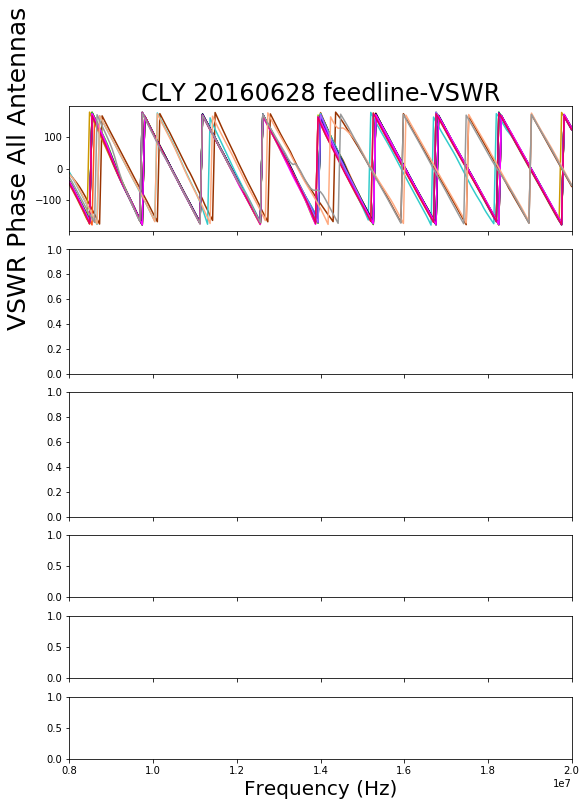

In [8]:
# PLOTTING
numplots = 6
plot_num = 0
fig, smpplot = plt.subplots(numplots, 1, sharex='all', figsize=(9, 12),
                            gridspec_kw={'height_ratios': [2, 2, 2, 1, 1, 1]})
xmin, xmax, ymin, ymax = smpplot[0].axis(xmin=8e6, xmax=20e6)
smpplot[numplots - 1].set_xlabel('Frequency (Hz)', size=20.0)
print("plotting")
smpplot[plot_num].set_title(plot_title, size=24.0)

# PLOT: Phase wrapped of all data
for channel in channels:
    smpplot[plot_num].plot(working_dataframe.loc[:,'freq'], working_dataframe.loc[:,channel + 'phase_deg'], label=channel,
                    color=colour_dictionary[channel])
smpplot[plot_num].set_ylabel('VSWR Phase All Antennas', size=25.0)
plot_num += 1

# PLOT: combined arrays dB and phase.
smpplot[plot_num].plot(working_dataframe.loc[:,'freq'], working_dataframe.loc[:,'M_all_phase_deg'],
                color='#2942a8', label='Main Array')

smpplot[plot_num].plot(working_dataframe.loc[:,'freq'], working_dataframe.loc[:,'I_all_phase_deg'],
                color='#8ba1fa', label='Intf Array')

db_smpplot = smpplot[plot_num].twinx()

db_smpplot.plot(working_dataframe.loc[:,'freq'], working_dataframe.loc[:,'M_all_magnitude'],
                color='#bd3f3f', label='Main Array')
db_smpplot.plot(working_dataframe.loc[:,'freq'], working_dataframe.loc[:,'I_all_magnitude'],
                color='#f99191', label='Intf Array')

smpplot[plot_num].set_ylabel('Incoming Feedline Array\nPhase [degrees]', color='#3352cd',
                      size=25.0)
# blue
smpplot[plot_num].tick_params(axis='y', labelcolor='#3352cd')

# from antenna to feedline end at building.
db_smpplot.set_ylabel('Combined\nArray [dB]', color='#de4b4b', size=25.0)  # red
db_smpplot.tick_params(axis='y', labelcolor='#de4b4b')
# referenced to power at a single antenna
plot_num += 1

# PLOT: Time difference between arrays single direction TODO this is not 1 direction
smpplot[plot_num].set_ylabel('S12 Perceived Time\nDifference b/w arrays\n Based on Phase ['
                      'ns]', size=25.0)
smpplot[plot_num].plot(working_dataframe.loc[:,'freq'], working_dataframe.loc[:,'M_all_magnitude'],)
plot_num += 1

# PLOT: Main Array Offset from their Best Fit Lines, and Intf Array
for ant, dataset in all_data.items():
    if ant[0] == 'M':  # plot with main array
        smpplot[plot_num].plot(dataset['freq'], linear_fit_dict[ant][
            'offset_of_best_fit_rads'] * 180.0 / math.pi,
                        label='{}, delay={} ns'.format(ant,
                                                       linear_fit_dict[ant]['time_delay_ns']),
                        color=colour_dictionary[ant])
    elif ant[0] == 'I':
        smpplot[plot_num + 1].plot(dataset['freq'], linear_fit_dict[ant][
            'offset_of_best_fit_rads'] * 180.0 / math.pi,
                label='{}, delay={} ns'.format(ant, linear_fit_dict[ant][
                    'time_delay_ns']), color=colour_dictionary[ant])

smpplot[plot_num].plot(all_data['M0']['freq'], linear_fit_dict['M_all'][
    'offset_of_best_fit_rads'] * 180.0 / math.pi, color=colour_dictionary['other'],
        label='Combined Main, delay={} ns'.format(linear_fit_dict[
            'M_all']['time_delay_ns']))  # plot last
smpplot[plot_num + 1].plot(all_data['M0']['freq'], linear_fit_dict['I_all'][
    'offset_of_best_fit_rads'] * 180.0 / math.pi, color=colour_dictionary['other'],
        label='Combined Intf, delay={} ns'.format(linear_fit_dict[
            'I_all']['time_delay_ns']))  # plot last


smpplot[plot_num].legend(fontsize=10, ncol=4, loc='upper right')
smpplot[plot_num + 1].legend(fontsize=12, loc='upper right')
smpplot[plot_num].set_ylabel('S12 Main Phase Offset\n from Own Line of Best\nFit ['
                             'degrees]', size=15.0)
smpplot[plot_num + 1].set_ylabel('S12 Intf Phase Offset\n from Own Line of Best\nFit [degrees]', size=15.0)
plot_num += 2

# PLOT: Phase wrapped of all data
for ant, dataset in all_data_phase_wrapped.items():
    smpplot[plot_num].plot(dataset['freq'], dataset['phase_deg'], label=ant,
                    color=colour_dictionary[ant])
smpplot[plot_num].set_ylabel('S12 Phase All Antennas')

if missing_data:  # not empty
    missing_data_statement = "***MISSING DATA FROM ANTENNA(S) "
    for element in missing_data:
        missing_data_statement = missing_data_statement + element + " "
    print(missing_data_statement)
    plt.figtext(0.65, 0.05, missing_data_statement, fontsize=15)

if data_description:
    print(data_description)
    plt.figtext(0.65, 0.10, data_description, fontsize=15)

for plot in range(0, numplots):
    smpplot[plot].grid()